# ST002773
## Cleanup the metadata for ST002773 Shanghai LungCancer and prepare for finetune using the pretrained model


https://www.metabolomicsworkbench.org/data/DRCCMetadata.php?Mode=Study&StudyID=ST002773

### Collection:

This case-control study was nested in a prospective Shanghai Women’s Health Study (December 28, 1996 - May 23, 2000), which has been previously described [17, 18]. Briefly, the SWHS is a population-based prospective cohort study in Shanghai, China where 74,942 women aged 40-70 years were recruited by a trained interviewer and a community health worker. The women were followed through multiple in-person interviews and self-administered questionnaires to obtain information on demographics, occupational and environmental exposures, lifestyle, dietary, and other factors, including environmental tobacco smoke (ETS) and body mass index (BMI). The participation rate was 92.7%. Cohort members are followed for cancer diagnosis through in-person follow-up surveys administered every 2–3 years and annual record linkage with the Shanghai Cancer Registry and Vital Statistics Unit. All incident lung cancer cases were eligible for the current study. All study participants provided written informed consent before being interviewed, and the study protocols were approved by the institutional review boards of all participating institutions.

### Treatment:

Lung cancer cases were defined based on the International Classification of Diseases for Oncology, Second Edition (ICD-O-2), and included all primary malignant cancers that were coded as 80003, 80413, 80703, 81403, 82403, 82603, 84803, 85503, and 85603. Lung cancer was diagnosed between 2000-2014 (average follow-up: 7.0 years; range: 0 – 13 years). For each case of lung cancer, a never-smoking control matched on age (± 2 years) were selected. A total of 790 (395 cases-control pairs) lifetime never-smokers based on the standard definition used by the U.S. Centers for Disease Control (CDC) of adults who has never smoked, or who has smoked less than 100 cigarettes in their lifetime were included in the analysis.

### notes
there should be BMI data for in the study, but it may not be available for us to use

Related paper:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5862245/


In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
main_dir = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/MS_Data/ST002773_Shanghai_LungCancer'
x_rcc_test_file = '/Users/jonaheaton/ReviveMed Dropbox/Jonah Eaton/development_CohortCombination/alignment_RCC_2024_Feb_27/April_30_Finetune_Data/X_finetune_test.csv'

x_rcc_test = pd.read_csv(x_rcc_test_file, index_col=0)

In [7]:
main_alignment = pd.read_csv(f'{main_dir}/alignment_df.csv', index_col=0)
intensity_matrix = pd.read_csv(f'{main_dir}/combined_study.csv', index_col=0)

In [50]:
main_metadata = pd.read_csv(f'{main_dir}/metadata.csv', index_col=0)

In [51]:
main_metadata.head()

,Sample ID,Factors.Subject_ID,Factors.LungCancer,Batch,Raw_files,AGE
Subject ID,,,,,,
-,nist1,NIST_1950,-,1,F076_200713_M331_006,-
-,q3June2014_1a,PooledQAQC,-,1,F076_200713_M331_012,-
-,q3June2014_1b,PooledQAQC,-,1,F076_200713_M331_018,-
-,SWHS0039,Study_sample,case,1,F076_200713_M331_024,68
-,SWHS0115,Study_sample,control,1,F076_200713_M331_030,68


## Notes on this data

- the current metadata has only the even files, which usually correspond to the RP-neg column
- the odd files usuaulyl correspond to the Hilic-pos column
- additionally, each sample was repeated 3 times, so we have 3 files for each sample
- the first file is '_006", and since we know there are a total of 6 files, we can infer that the matching files to this metadata are:
- so "_002", "_004", "_006" are the same sample, but different runs in the RP-neg column
- while "__001", "_003", "_005" are the same sample, but different runs in the Hilic-pos column

- so we need to increment by -2 to get the matching files for the RP-neg column
- and increment by and by -1 on that matrix to get the matching files for the Hilic-pos column
- one final complication, it appears that this metadata was duplicated

In [75]:
# first lets get rid of the duplicates in the metadata
# Remove duplicate rows based on 'col_name'
print(main_metadata.shape)
main_metadata = main_metadata.drop_duplicates(subset='Raw_files', keep='first')
print(main_metadata.shape)

(2304, 6)
(1152, 6)


In [76]:
def increment_the_last_number(df, column_name, amount=2):
    def decrement(s):
        head, _, tail = s.rpartition('_')
        return f"{head}_{int(tail) + int(amount):03}"
    
    df[column_name] = df[column_name].apply(decrement)
    return df

In [78]:
main_metadata_RP_part1 = main_metadata.copy()
main_metadata_RP_part2 = increment_the_last_number(main_metadata_RP_part1.copy(), 'Raw_files', -2)
main_metadata_RP_part3 = increment_the_last_number(main_metadata_RP_part2.copy(), 'Raw_files', -2)


In [56]:
main_metadata_RP_part3

,Sample ID,Factors.Subject_ID,Factors.LungCancer,Batch,Raw_files,AGE
Raw_files,,,,,,
F076_200713_M331_002,nist1,NIST_1950,-,1,F076_200713_M331_002,-
F076_200713_M331_008,q3June2014_1a,PooledQAQC,-,1,F076_200713_M331_008,-
F076_200713_M331_014,q3June2014_1b,PooledQAQC,-,1,F076_200713_M331_014,-
F076_200713_M331_020,SWHS0039,Study_sample,case,1,F076_200713_M331_020,68
F076_200713_M331_026,SWHS0115,Study_sample,control,1,F076_200713_M331_026,68
...,...,...,...,...,...,...
F076_201011_M331_254,SWHS0646,Study_sample,case,25,F076_201011_M331_254,65
F076_201011_M331_260,SWHS0672,Study_sample,control,25,F076_201011_M331_260,65
F076_201011_M331_266,q3June2014_25e,PooledQAQC,-,25,F076_201011_M331_266,-


In [79]:
main_metadata_RP = pd.concat([main_metadata_RP_part1, main_metadata_RP_part2, main_metadata_RP_part3], axis=0)
main_metadata_RP['Column Name'] = 'RP Negative'
main_metadata_Hilic = main_metadata_RP.copy()
main_metadata_Hilic['Column Name'] = 'Hilic Positive'
main_metadata_Hilic = increment_the_last_number(main_metadata_Hilic, 'Raw_files', -1)

main_metadata_full = pd.concat([main_metadata_RP, main_metadata_Hilic], axis=0)
main_metadata_full.index = main_metadata_full['Raw_files']

In [81]:
main_metadata_full.sort_index(inplace=True)
main_metadata_full['mzml_file'] = main_metadata_full['Raw_files'].apply(lambda x: x + '.mzML')
main_metadata_full.index = main_metadata_full['mzml_file'].to_list()

In [96]:
file_info = pd.read_csv(f'{main_dir}/Data-engine_ST002773_file_info.csv', index_col=0)

In [98]:
main_metadata_full = main_metadata_full.join(file_info, how='left')

In [106]:
file_groups_dir = os.path.join(main_dir, 'file_groups')
for i in range(4):
    evens_groups_path = os.path.join(file_groups_dir, f'even_files_group_{i}.txt')
    odds_groups_path = os.path.join(file_groups_dir, f'odd_files_group_{i}.txt')

    if os.path.exists(evens_groups_path):
        evens_groups_list = []
        with open(evens_groups_path, 'r') as f:
            evens_groups_list = f.read().splitlines()
        main_metadata_full.loc[evens_groups_list, 'Group'] = f'Evens Group {i}'
    

    if os.path.exists(odds_groups_path):
        odds_groups_list = []
        with open(odds_groups_path, 'r') as f:
            odds_groups_list = f.read().splitlines()
        main_metadata_full.loc[odds_groups_list, 'Group'] = f'Odds Group {i}'


In [180]:
main_metadata_full['Factors.Subject_ID'].to_list()

['NIST_1950',
 'NIST_1950',
 'NIST_1950',
 'NIST_1950',
 'NIST_1950',
 'NIST_1950',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'PooledQAQC',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_QAQC',
 'Study_QAQC',
 'Study_QAQC',
 'Study_QAQC',
 'Study_QAQC',
 'Study_QAQC',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_QAQC',
 'Study_QAQC',
 'Study_QAQC',
 'Study_QAQC',
 'Study_QAQC',
 'Study_QAQC',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_sample',
 'Study_QAQC',
 'Study_QAQC',
 'Study_QAQC',
 

In [177]:
def is_pool(x):
    if 'pool' in x.lower():
        return True
    return False

def other_qc(x):
    if 'qc' in x.lower():
        return True
    if 'nist' in x.lower():
        return True
    return False

def is_qc(x):
    return other_qc(x) | is_pool(x)

In [181]:
## assign the QC and pool samples
main_metadata_full['QC'] = main_metadata_full['Factors.Subject_ID'].apply(is_qc)
main_metadata_full['Pool'] = main_metadata_full['Factors.Subject_ID'].apply(is_pool)


In [198]:
main_metadata_full['Age'] = pd.to_numeric(main_metadata_full['AGE'], errors='coerce')

In [207]:
main_metadata_full['Cancer'] = np.nan
main_metadata_full.loc[main_metadata_full['Factors.LungCancer'] == 'case', 'Cancer'] = 1
main_metadata_full.loc[main_metadata_full['Factors.LungCancer'] == 'control', 'Cancer'] = 0

In [210]:
is_patient = ~main_metadata_full['Factors.Subject_ID'].apply(is_qc)

In [211]:
# all of the patients are female in this study
main_metadata_full['Sex'] = 'NA'
main_metadata_full.loc[main_metadata_full['Pool'],'Sex'] = 'F'
main_metadata_full.loc[is_patient,'Sex'] = 'F'

# We know that are were all from China
main_metadata_full['Region'] = 'NA'
main_metadata_full.loc[main_metadata_full['Pool'],'Region'] = 'China'
main_metadata_full.loc[is_patient,'Region'] = 'China'


# We are told that all of the patients were never-smokers
# Smoker Values: Never, Past, Current
main_metadata_full['Smoker'] = 'NA'
main_metadata_full.loc[main_metadata_full['Pool'],'Smoker'] = 'Never'
main_metadata_full.loc[is_patient,'Smoker'] = 'Never'

In [212]:
main_metadata_full.to_csv(f'{main_dir}/metadata_complete.csv')

In [83]:
common_feats = [x for x in x_rcc_test.columns if x in intensity_matrix.index]
missing_feats = [x for x in x_rcc_test.columns if x not in intensity_matrix.index]

In [84]:
print(f'number of common features with the pretraining data: {len(common_feats)}')

number of common features with the pretraining data: 1400


In [85]:
common_samples = [x for x in main_metadata_full.index if x in intensity_matrix.columns]
missing_samples = [x for x in main_metadata_full.index if x not in intensity_matrix.columns]

In [86]:
print(f'number of common samples with the pretraining data: {len(common_samples)}')
print(f'number of missing samples with the pretraining data: {len(missing_samples)}')
# since there are RP neg data in this complete metadata, we expect half to be missing samples

number of common samples with the pretraining data: 3455
number of missing samples with the pretraining data: 3457


In [89]:
# missing_samples
# missing_samples = ['F076_200713_M331_006.mzML', 'F076_200713_M331_012.mzML', 'F076_200713_M331_018.mzML', 'F076_200713_M331_024.mzML', 'F076_200713_M331_030.mzML']

def check_odd_number(sample):
    last_digit = int(sample[-6])
    if last_digit % 2 != 0:
        return True
    return False

odd_samples = [sample for sample in missing_samples if check_odd_number(sample)]

if odd_samples:
    print("Some missing samples end in an odd number:")
    for sample in odd_samples:
        print(sample)
else:
    print("No missing samples end in an odd number.")


Some missing samples end in an odd number:
F076_201004_M331_273.mzML


the missing sample (F076_201004_M331_273) is in the originally generated file_info, so we know that is should be there...

It was processed by job 626, and after inspection, it was labeled as a problem file

In [184]:
subset_metadata = main_metadata_full.loc[common_samples, :].copy()

In [19]:
intensity_matrix

,1195_Marios_PD1_Inhib2_HP-EA344251-6.mzML,0215_Marios_PD1_Inhib2_HP-E9774340-6.mzML,0060a_Marios_RCC_HP-RPREFA04.mzML,0371_Marios_PD1_Inhib2_HP-E9172456-7.mzML,0140b_Marios_PD1_Inhib2_HP-PREFB8.mzML,0872_Marios_PD1_Inhib2_HP-E9784261-7.mzML,0904_Marios_PD1_Inhib2_HP-AE104726-6.mzML,0173_Marios_RCC_HP-001100038-3.mzML,0060a_Marios_PD1_Inhib2_HP-PREFA4.mzML,0064_Marios_PD1_Inhib2_HP-E9656483-7.mzML,...,F076_201009_M331_135.mzML,F076_200725_M331_143.mzML,F076_200713_M331_165.mzML,F076_200727_M331_051.mzML,F076_200727_M331_219.mzML,F076_200928_M331_215.mzML,F076_200922_M331_159.mzML,F076_200714_M331_225.mzML,F076_201004_M331_243.mzML,F076_200927_M331_203.mzML
FT10040,19.471362,21.726874,20.022141,19.485207,20.022141,20.386266,20.839264,20.976508,20.022141,20.406452,...,13.679035,11.357582,11.357582,11.357582,11.357582,13.792635,12.391436,17.065630,11.357582,11.357582
FT10041,17.357265,18.132775,16.428846,18.741773,18.056762,19.117123,17.438787,16.428846,18.056762,18.049007,...,12.928089,10.824422,10.824422,14.692303,15.045135,14.257764,13.982184,14.853831,14.877614,15.293591
FT10068,15.484371,17.159565,17.856157,16.826214,17.856157,17.428470,17.628572,19.022642,17.856157,17.843003,...,14.753378,14.735103,15.128680,15.263475,15.431741,15.213896,15.255257,15.239669,14.789520,15.218294
FT10089,21.567619,22.131312,22.214015,21.297333,22.214015,22.446499,22.665553,22.420295,22.214015,21.965565,...,15.940429,13.993891,15.922299,14.378443,16.007716,15.771400,14.635753,16.359676,13.993891,15.665147
FT10091,22.657134,23.304124,23.385530,22.409561,23.385530,23.579748,23.831233,23.840568,23.385530,23.221626,...,16.849745,17.958026,17.125890,16.093093,17.283496,16.906577,15.955728,17.640736,16.708159,16.976902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FT9914,16.554078,20.013178,20.205719,18.294600,20.205719,18.774603,20.440971,20.811292,20.205719,18.664629,...,17.855852,13.772227,16.405812,17.168522,17.486224,16.314459,13.772227,15.957644,16.926036,16.295005
FT9916,15.479665,18.328471,18.665767,15.479665,18.665767,18.792977,18.529606,19.994048,18.665767,18.420565,...,15.514531,11.655922,15.056255,11.655922,11.655922,14.963265,11.655922,15.297515,11.655922,13.362771
FT9972,16.240618,19.399239,18.897499,18.368349,18.897499,18.777465,17.780499,19.735556,18.897499,19.007398,...,13.375389,13.375389,16.173614,13.375389,16.167855,16.028768,16.009578,16.583373,13.375389,15.773943
FT9975,16.195960,16.195960,18.354473,16.195960,18.354473,16.195960,18.489062,18.301832,18.354473,16.195960,...,13.730901,17.481639,14.644725,15.552512,16.430819,15.336635,15.096962,16.834583,13.730901,15.310336


In [94]:
main_matrix = intensity_matrix.loc[common_feats][subset_metadata.index]


In [95]:
import seaborn as sns
import umap
from sklearn.decomposition import PCA

def generate_pca_embedding(matrix, n_components=2):
    pca = PCA(n_components=n_components)
    embedding = pca.fit_transform(matrix.T)
    return embedding

def generate_umap_embedding(matrix, n_components=2):

    reducer = umap.UMAP(n_components=n_components)
    embedding = reducer.fit_transform(matrix.T)
    return embedding

def plot_pca(embedding,metadata,col_name,yes_umap=False):

    if yes_umap:
        xvar = 'UMAP1'
        yvar = 'UMAP2'
    else:
        xvar = 'PCA1'
        yvar = 'PCA2'
    if metadata[col_name].nunique() < 10:
        palette = sns.color_palette("tab10", metadata[col_name].nunique())
        sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=metadata[col_name], palette=palette)
    else:
        sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=metadata[col_name])
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name)
    plt.xlabel(xvar)
    plt.ylabel(yvar)

    # add counts to the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    if metadata[col_name].nunique() < 15:
        labels = [f'{x} ({metadata[metadata[col_name]==x].shape[0]})' for x in labels]
        plt.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title=col_name,
            ncol=2)  # ncol=2 makes the legend have 2 columns

    # add the number of samples to the title
    plt.title(f'N samples = {metadata[~metadata[col_name].isna()].shape[0]}')


In [102]:
embedding0 = generate_pca_embedding(main_matrix)
embedding1 = generate_umap_embedding(main_matrix)

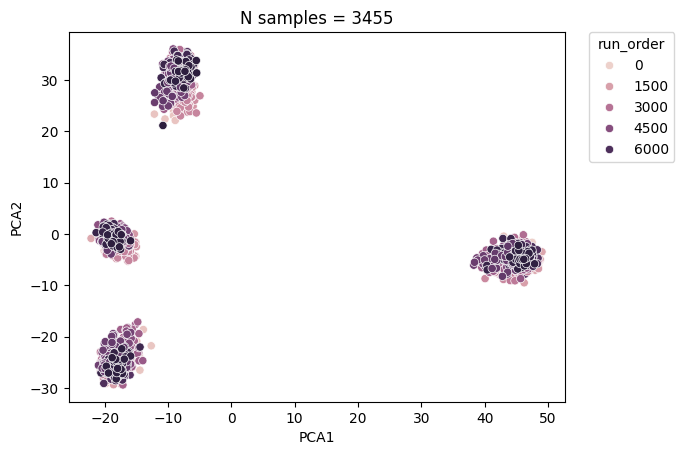

In [104]:
plot_pca(embedding0,subset_metadata,col_name='run_order',yes_umap=False)

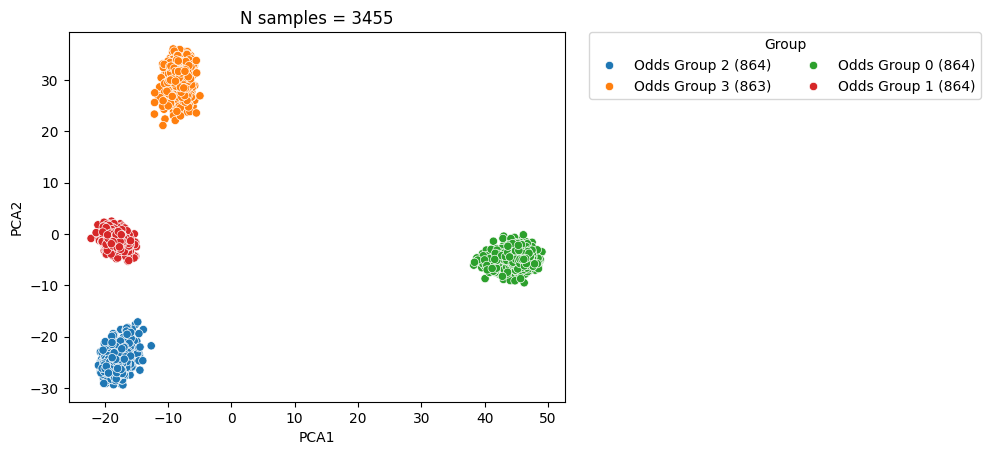

In [135]:
plot_pca(embedding0,subset_metadata,col_name='Group',yes_umap=False)

# Clean up these artifial batches
clearly the four batches used to run mzlearn are showing up here
what is quickest way to fix this?
get the average of each feature in each group

In [110]:
feat_avgs_dct ={}
for i in range(4):
    subset_metadata_group = subset_metadata[subset_metadata['Group'] == f'Odds Group {i}']
    main_matrix_group = main_matrix[subset_metadata_group.index]
    feat_avgs = main_matrix_group.mean(axis=1)
    feat_avgs_dct[f'Odds Group {i}'] = feat_avgs


In [148]:
across_groups_df = pd.DataFrame(feat_avgs_dct)
avg_across_groups = across_groups_df.mean(axis=1)
# subtraction/addition is okay since we are working in log2 space
correct_group_df = across_groups_df - avg_across_groups.values.reshape(-1,1)

In [150]:
across_groups_df

,Odds Group 0,Odds Group 1,Odds Group 2,Odds Group 3
FT10041,13.789143,15.107979,15.146252,15.175180
FT10068,15.170383,15.107979,13.220529,13.242023
FT10089,15.765590,15.107979,15.623743,15.618400
FT10091,17.006288,15.107979,15.146252,16.962541
FT10097,12.029889,15.107979,12.285123,12.217377
...,...,...,...,...
FT9912,15.935418,15.795097,15.876719,15.795640
FT9913,16.100453,16.075095,16.047467,16.119192
FT9914,16.655131,16.692936,16.707523,16.721758
FT9975,15.523612,15.412607,15.665484,15.625991


In [149]:
correct_group_df

,Odds Group 0,Odds Group 1,Odds Group 2,Odds Group 3
FT10041,-1.015496,0.303341,0.341614,0.370541
FT10068,0.985155,0.922750,-0.964699,-0.943205
FT10089,0.236662,-0.420949,0.094815,0.089472
FT10091,0.950523,-0.947786,-0.909513,0.906776
FT10097,-0.880203,2.197887,-0.624969,-0.692715
...,...,...,...,...
FT9912,0.084700,-0.055621,0.026000,-0.055079
FT9913,0.014901,-0.010457,-0.038085,0.033640
FT9914,-0.039206,-0.001401,0.013186,0.027421
FT9975,-0.033311,-0.144316,0.108560,0.069067


In [159]:
corrected_matrix = main_matrix.copy()
for i in range(4):
    subset_metadata_group = subset_metadata[subset_metadata['Group'] == f'Odds Group {i}']
    main_matrix_group = main_matrix[subset_metadata_group.index]
    corrected_matrix[subset_metadata_group.index] = main_matrix_group - correct_group_df[f'Odds Group {i}'].values.reshape(-1,1)

In [160]:
corrected_feat_avgs_dct ={}
for i in range(4):
    subset_metadata_group = subset_metadata[subset_metadata['Group'] == f'Odds Group {i}']
    main_matrix_group = corrected_matrix[subset_metadata_group.index]
    feat_avgs = main_matrix_group.mean(axis=1)
    corrected_feat_avgs_dct[f'Odds Group {i}'] = feat_avgs

corrected_across_groups_df = pd.DataFrame(corrected_feat_avgs_dct)
corrected_across_groups_df

,Odds Group 0,Odds Group 1,Odds Group 2,Odds Group 3
FT10041,14.804638,14.804638,14.804638,14.804638
FT10068,14.185229,14.185229,14.185229,14.185229
FT10089,15.528928,15.528928,15.528928,15.528928
FT10091,16.055765,16.055765,16.055765,16.055765
FT10097,12.910092,12.910092,12.910092,12.910092
...,...,...,...,...
FT9912,15.850718,15.850718,15.850718,15.850718
FT9913,16.085551,16.085551,16.085551,16.085551
FT9914,16.694337,16.694337,16.694337,16.694337
FT9975,15.556924,15.556924,15.556924,15.556924


In [161]:
embedding0_corrected = generate_pca_embedding(corrected_matrix)

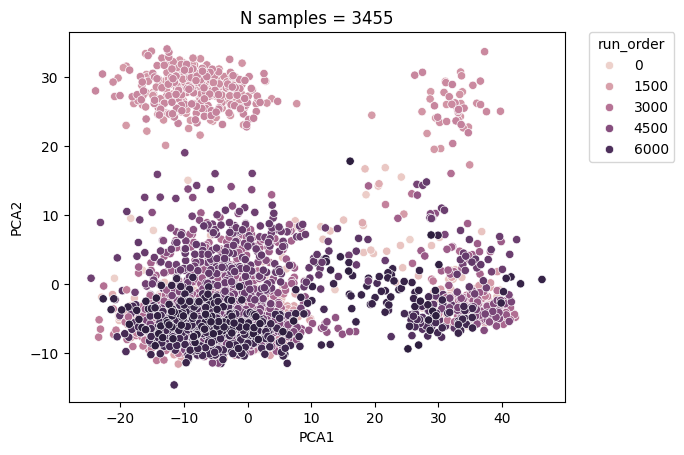

In [162]:
plot_pca(embedding0_corrected,subset_metadata,col_name='run_order',yes_umap=False)

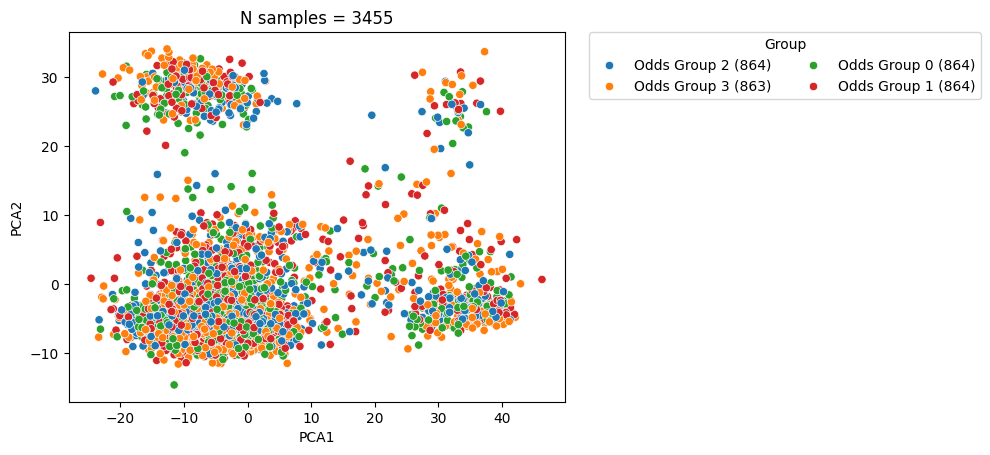

In [163]:
plot_pca(embedding0_corrected,subset_metadata,col_name='Group',yes_umap=False)

## Scale the data with StandardScaler

In [164]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
corrected_matrix_scaled = scaler.fit_transform(corrected_matrix.T)
corrected_matrix_scaled = pd.DataFrame(corrected_matrix_scaled, index=corrected_matrix.columns, columns=corrected_matrix.index)

In [166]:
corrected_matrix_scaled.isna().sum().sum()

0

In [167]:
embedding0s = generate_pca_embedding(corrected_matrix_scaled.T)
embedding1s = generate_umap_embedding(corrected_matrix_scaled.T)

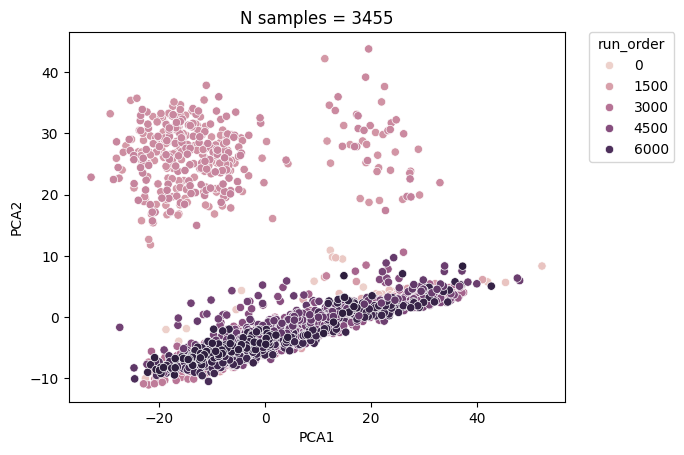

In [169]:
plot_pca(embedding0s,subset_metadata,col_name='run_order',yes_umap=False)

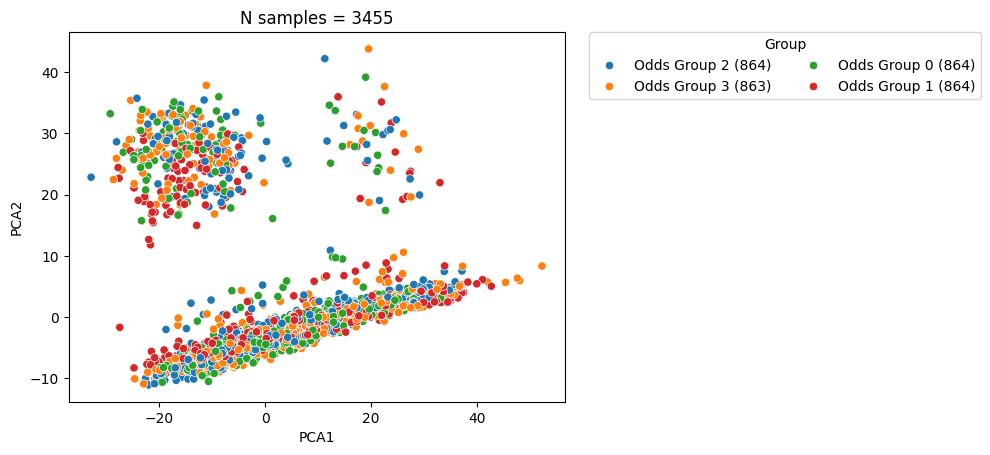

In [170]:
plot_pca(embedding0s,subset_metadata,col_name='Group',yes_umap=False)

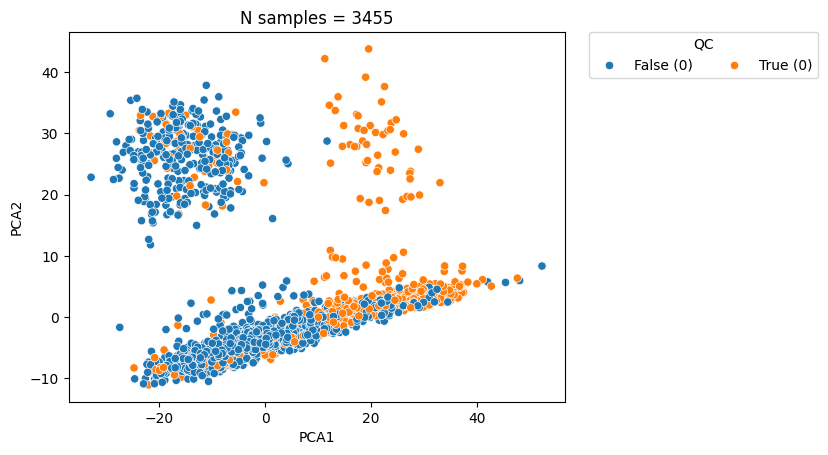

In [185]:
plot_pca(embedding0s,subset_metadata,col_name='QC',yes_umap=False)

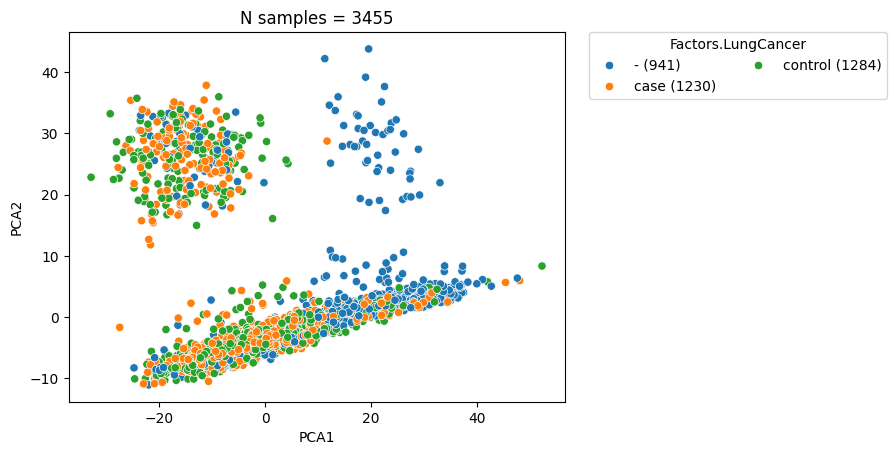

In [189]:
plot_pca(embedding0s,subset_metadata,col_name='Factors.LungCancer',yes_umap=False)

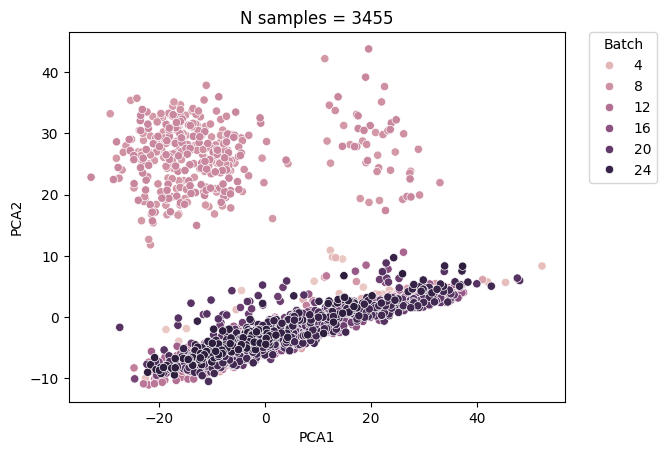

In [205]:
plot_pca(embedding0s,subset_metadata,col_name='Batch',yes_umap=False)

## Place the data in the dataframe ready for the pretrained model

In [270]:
data_matrix = pd.DataFrame(index=x_rcc_test.columns, columns=subset_metadata.index)
data_matrix.loc[common_feats] = corrected_matrix.copy()
data_matrix.fillna(corrected_matrix.mean(),inplace=True)

scaler = StandardScaler()
data_matrix = scaler.fit_transform(data_matrix.T).T
data_matrix = pd.DataFrame(data_matrix, index=x_rcc_test.columns, columns=subset_metadata.index)

In [190]:
subset_metadata['Cancer'] = np.nan
subset_metadata.loc[subset_metadata['Factors.LungCancer'] == 'case', 'Cancer'] = 1
subset_metadata.loc[subset_metadata['Factors.LungCancer'] == 'control', 'Cancer'] = 0


In [196]:
subset_metadata['Age'] = pd.to_numeric(subset_metadata['AGE'], errors='coerce')


In [202]:
only_patients = subset_metadata[~subset_metadata['Cancer'].isna()]


In [203]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


In [204]:
only_patients

,Sample ID,Factors.Subject_ID,Factors.LungCancer,Batch,Raw_files,AGE,Column Name,mzml_file,timestamp,npy_file,run_order,ms precision,npy file size (mb),mzml file size (mb),runtime_hour,Group,QC,Pool,Cancer,Age
F076_200713_M331_019.mzML,SWHS0039,Study_sample,case,1,F076_200713_M331_019,68,Hilic Positive,F076_200713_M331_019.mzML,2020-07-19 12:23:44,F076_200713_M331_019.npy,846,0.000005,20.059280,15.621919,94.541111,Odds Group 3,False,False,1.0,68.0
F076_200713_M331_021.mzML,SWHS0039,Study_sample,case,1,F076_200713_M331_021,68,Hilic Positive,F076_200713_M331_021.mzML,2020-07-19 12:37:02,F076_200713_M331_021.npy,848,0.000005,20.098976,15.616638,94.762778,Odds Group 0,False,False,1.0,68.0
F076_200713_M331_023.mzML,SWHS0039,Study_sample,case,1,F076_200713_M331_023,68,Hilic Positive,F076_200713_M331_023.mzML,2020-07-19 12:50:22,F076_200713_M331_023.npy,850,0.000005,20.064632,15.579745,94.985000,Odds Group 1,False,False,1.0,68.0
F076_200713_M331_025.mzML,SWHS0115,Study_sample,control,1,F076_200713_M331_025,68,Hilic Positive,F076_200713_M331_025.mzML,2020-07-19 13:03:42,F076_200713_M331_025.npy,852,0.000005,20.384144,15.795913,95.207222,Odds Group 2,False,False,0.0,68.0
F076_200713_M331_027.mzML,SWHS0115,Study_sample,control,1,F076_200713_M331_027,68,Hilic Positive,F076_200713_M331_027.mzML,2020-07-19 13:17:02,F076_200713_M331_027.npy,854,0.000005,20.324816,15.728318,95.429444,Odds Group 3,False,False,0.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_255.mzML,SWHS0646,Study_sample,case,25,F076_201011_M331_255,65,Hilic Positive,F076_201011_M331_255.mzML,2020-10-25 23:18:20,F076_201011_M331_255.npy,6884,0.000005,22.549976,17.048502,2457.451111,Odds Group 2,False,False,1.0,65.0
F076_201011_M331_257.mzML,SWHS0646,Study_sample,case,25,F076_201011_M331_257,65,Hilic Positive,F076_201011_M331_257.mzML,2020-10-25 23:34:43,F076_201011_M331_257.npy,6886,0.000005,22.623032,17.086338,2457.724167,Odds Group 3,False,False,1.0,65.0
F076_201011_M331_259.mzML,SWHS0672,Study_sample,control,25,F076_201011_M331_259,65,Hilic Positive,F076_201011_M331_259.mzML,2020-10-25 23:51:11,F076_201011_M331_259.npy,6888,0.000005,22.395584,17.002668,2457.998611,Odds Group 0,False,False,0.0,65.0
F076_201011_M331_261.mzML,SWHS0672,Study_sample,control,25,F076_201011_M331_261,65,Hilic Positive,F076_201011_M331_261.mzML,2020-10-26 00:07:35,F076_201011_M331_261.npy,6890,0.000005,22.507232,17.044993,2458.271944,Odds Group 1,False,False,0.0,65.0


In [217]:
only_patients

,Sample ID,Factors.Subject_ID,Factors.LungCancer,Batch,Raw_files,AGE,Column Name,mzml_file,timestamp,npy_file,run_order,ms precision,npy file size (mb),mzml file size (mb),runtime_hour,Group,QC,Pool,Cancer,Age
F076_200713_M331_019.mzML,SWHS0039,Study_sample,case,1,F076_200713_M331_019,68,Hilic Positive,F076_200713_M331_019.mzML,2020-07-19 12:23:44,F076_200713_M331_019.npy,846,0.000005,20.059280,15.621919,94.541111,Odds Group 3,False,False,1.0,68.0
F076_200713_M331_021.mzML,SWHS0039,Study_sample,case,1,F076_200713_M331_021,68,Hilic Positive,F076_200713_M331_021.mzML,2020-07-19 12:37:02,F076_200713_M331_021.npy,848,0.000005,20.098976,15.616638,94.762778,Odds Group 0,False,False,1.0,68.0
F076_200713_M331_023.mzML,SWHS0039,Study_sample,case,1,F076_200713_M331_023,68,Hilic Positive,F076_200713_M331_023.mzML,2020-07-19 12:50:22,F076_200713_M331_023.npy,850,0.000005,20.064632,15.579745,94.985000,Odds Group 1,False,False,1.0,68.0
F076_200713_M331_025.mzML,SWHS0115,Study_sample,control,1,F076_200713_M331_025,68,Hilic Positive,F076_200713_M331_025.mzML,2020-07-19 13:03:42,F076_200713_M331_025.npy,852,0.000005,20.384144,15.795913,95.207222,Odds Group 2,False,False,0.0,68.0
F076_200713_M331_027.mzML,SWHS0115,Study_sample,control,1,F076_200713_M331_027,68,Hilic Positive,F076_200713_M331_027.mzML,2020-07-19 13:17:02,F076_200713_M331_027.npy,854,0.000005,20.324816,15.728318,95.429444,Odds Group 3,False,False,0.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_255.mzML,SWHS0646,Study_sample,case,25,F076_201011_M331_255,65,Hilic Positive,F076_201011_M331_255.mzML,2020-10-25 23:18:20,F076_201011_M331_255.npy,6884,0.000005,22.549976,17.048502,2457.451111,Odds Group 2,False,False,1.0,65.0
F076_201011_M331_257.mzML,SWHS0646,Study_sample,case,25,F076_201011_M331_257,65,Hilic Positive,F076_201011_M331_257.mzML,2020-10-25 23:34:43,F076_201011_M331_257.npy,6886,0.000005,22.623032,17.086338,2457.724167,Odds Group 3,False,False,1.0,65.0
F076_201011_M331_259.mzML,SWHS0672,Study_sample,control,25,F076_201011_M331_259,65,Hilic Positive,F076_201011_M331_259.mzML,2020-10-25 23:51:11,F076_201011_M331_259.npy,6888,0.000005,22.395584,17.002668,2457.998611,Odds Group 0,False,False,0.0,65.0
F076_201011_M331_261.mzML,SWHS0672,Study_sample,control,25,F076_201011_M331_261,65,Hilic Positive,F076_201011_M331_261.mzML,2020-10-26 00:07:35,F076_201011_M331_261.npy,6890,0.000005,22.507232,17.044993,2458.271944,Odds Group 1,False,False,0.0,65.0


In [220]:
corrected_matrix_scaled

,FT10041,FT10068,FT10089,FT10091,FT10097,FT10100,FT10101,FT10104,FT10152,FT10158,...,FT9901,FT9902,FT9903,FT9905,FT9911,FT9912,FT9913,FT9914,FT9975,FT9980
F076_200713_M331_001.mzML,0.301434,-1.156946,1.127561,0.555588,-1.084949,-0.922893,0.370822,-1.334463,-1.505477,-0.367694,...,-0.811034,1.155818,0.329009,1.264434,-1.468728,-0.077927,1.371506,0.758781,-1.516527,-1.117828
F076_200713_M331_003.mzML,0.272743,0.476013,0.655533,0.427471,2.083439,1.922723,1.134407,1.549345,0.250757,-0.348916,...,1.093893,1.338115,2.457592,1.050796,1.226175,-1.736764,-1.860711,0.115492,-1.409320,-0.872712
F076_200713_M331_005.mzML,-3.223461,0.390806,0.098899,-0.280996,0.673182,0.262617,0.546429,1.568938,0.098273,-0.314967,...,1.426451,1.923188,0.325291,2.075027,-1.300969,-0.563119,0.914804,-2.731692,-1.324685,0.935727
F076_200713_M331_007.mzML,-0.228760,-0.299975,-0.292257,-0.421639,-0.183481,-0.592058,-0.281419,-0.180942,-1.691090,-0.321015,...,-1.291658,-1.061872,3.129379,-0.893038,1.131037,0.151194,1.078336,0.623284,0.358753,1.377548
F076_200713_M331_009.mzML,-0.296403,-1.156946,1.660422,-0.546315,3.079099,-0.922893,-0.364633,0.962675,0.506752,-0.367694,...,1.221183,0.129538,-0.323518,0.009558,1.226152,0.655679,1.261251,0.102122,1.555297,1.088044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F076_201011_M331_273.mzML,-0.143368,-0.910587,1.176950,1.390402,1.917428,2.797470,2.045525,2.168943,0.064766,-0.348916,...,1.857695,1.912228,2.477387,1.900806,0.717970,1.015390,0.476333,-0.272330,0.869172,-0.872712
F076_201011_M331_275.mzML,0.384501,-0.162636,1.609766,1.238964,2.980397,-0.109290,3.220444,2.578882,0.136864,-0.314967,...,1.461650,2.424109,-0.135372,2.368948,-1.300969,1.196640,0.949966,0.320086,1.616277,-1.330070
F076_201011_M331_277.mzML,-0.349065,-0.457733,-0.445956,-0.643380,-0.279975,-0.592058,-0.429418,-1.404578,-0.251998,-0.321015,...,-1.291658,0.242305,-0.992166,0.342087,-1.291673,0.363902,0.834475,0.890797,-1.852039,-0.922102
F076_201011_M331_279.mzML,-0.268171,-1.156946,-2.065535,-0.494280,-1.084949,1.600283,-0.329902,1.139627,-1.505477,-0.367694,...,-0.811034,-0.754714,-0.292704,-0.767593,-1.468728,-1.403089,-1.297935,-1.417710,-1.516527,-1.117828


In [271]:
X = data_matrix.T.loc[only_patients.index].copy()
y = only_patients[['Cancer','Age','Group','Batch','Sample ID']].copy()

In [237]:
# ! pip install iterative-stratification

In [272]:
# from iterstrat.ml_stratifiers import StratifiedGroupKFold
from  sklearn.model_selection import StratifiedGroupKFold
from sklearn.model_selection import GroupShuffleSplit


# Initialize StratifiedGroupKFold
sgkf = StratifiedGroupKFold(n_splits=7, random_state=42, shuffle=True)

# Get the indices for the training and test sets
discovery_inds, test_inds = next(sgkf.split(y, y['Cancer'], groups=y['Sample ID']))

# # Create the training and test sets
y_discovery = y.iloc[discovery_inds]
y_test = y.iloc[test_inds]

In [273]:
data_dir = os.path.join(main_dir, 'data_v1')
os.makedirs(data_dir, exist_ok=True)

In [274]:
print(y_discovery['Cancer'].value_counts())
print(y_test['Cancer'].value_counts())

Cancer
0.0    1101
1.0    1053
Name: count, dtype: int64
Cancer
0.0    183
1.0    177
Name: count, dtype: int64


In [275]:
print(y['Sample ID'].nunique())
print(y_discovery['Sample ID'].nunique())
print(y_test['Sample ID'].nunique())

838
718
120


In [281]:
y_test.shape

(360, 5)

In [276]:
# Initialize StratifiedGroupKFold
sgkf = StratifiedGroupKFold(n_splits=5, random_state=42, shuffle=True)

# Get the indices for the training and test sets
train_train_inds, train_val_inds = next(sgkf.split(y_discovery, y_discovery['Cancer'], groups=y_discovery['Sample ID']))

# # Create the fixed training and val sets
y_train = y_discovery.iloc[train_train_inds]
y_val = y_discovery.iloc[train_val_inds]



In [282]:
print(y_discovery['Sample ID'].nunique())
print(y_train['Sample ID'].nunique())
print(y_val['Sample ID'].nunique())

718
574
144


In [284]:
y_train.shape

(1722, 5)

In [277]:
study_desc = 'shanghai'
X_train = X.loc[y_train.index]
X_val = X.loc[y_val.index]
X_test = X.loc[y_test.index]

y_train.to_csv(f'{data_dir}/y_{study_desc}_train.csv')
y_val.to_csv(f'{data_dir}/y_{study_desc}_val.csv')
y_test.to_csv(f'{data_dir}/y_{study_desc}_test.csv')
X_train.to_csv(f'{data_dir}/X_{study_desc}_train.csv')
X_val.to_csv(f'{data_dir}/X_{study_desc}_val.csv')
X_test.to_csv(f'{data_dir}/X_{study_desc}_test.csv')


In [278]:
X.to_csv(f'{data_dir}/X_{study_desc}_all.csv')
y.to_csv(f'{data_dir}/y_{study_desc}_all.csv')

X_discovery = X.loc[y_discovery.index]
X_discovery.to_csv(f'{data_dir}/X_{study_desc}_discovery.csv')
y_discovery.to_csv(f'{data_dir}/y_{study_desc}_discovery.csv')

### Ideally we want to do a cross-fold validation, but no time for that now

In [ ]:
# we need to split on the Sample ID, so each sample is only in one split
for i, (train_index, test_index) in enumerate(sgkf.split(y_discovery, y_discovery['Cancer'], groups=y_discovery['Sample ID'])):
    y_train = y_discovery.iloc[train_index]
    y_val = y_discovery.iloc[test_index]
    X_train = X.loc[y_train.index]
    X_val = X.loc[y_val.index]
    fold_dir = os.path.join(data_dir, f'fold_{i}')
    y_train.to_csv(f'{fold_dir}/y_{study_desc}_train.csv')
    y_val.to_csv(f'{fold_dir}/y_{study_desc}_val.csv')
    X_train.to_csv(f'{fold_dir}/X_{study_desc}_train.csv')
    X_val.to_csv(f'{fold_dir}/X_{study_desc}_val.csv')
    

In [268]:
X_train.shape

(1722, 1400)